<a href="https://colab.research.google.com/github/karahanmerves/BFRCA/blob/main/BFRC_Geadient_Boosting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#"Data mining approach for predicting fiber diameter, length, and ratio: A case study of BFRC (Basalt Fiber Reinforced Concrete)"
**WITH MULTIPLE REGRESSION**




#Import to Librarys


In [515]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#% matplotlib inline

#Download Data (format CSV)

In [516]:
dt = pd.read_csv('/content/bfrc.csv')
dt.head()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.00,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.05,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.10,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.15,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,0.02,30,0.20,4.74


In [517]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Su (kg/m3)            267 non-null    float64
 1   Cimento (kg/m3)       267 non-null    float64
 2   Ucucu kul (kg/m3)     267 non-null    float64
 3   Mikrosilika (kg/m3)   267 non-null    float64
 4   Kalin agrega (kg/m3)  267 non-null    float64
 5   Ince agrega (kg/m3)   267 non-null    int64  
 6   Su azaltici (kg/m3)   267 non-null    float64
 7   Fiber capi (mm)       267 non-null    float64
 8   Fiber uzunlugu (mm)   267 non-null    int64  
 9   Fiber orani (%)       267 non-null    float64
 10  Cekme dayanimi (MPa)  267 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 23.1 KB


## Checking the number of null values in th dataset

In [518]:
dt.isnull().sum()

Su (kg/m3)              0
Cimento (kg/m3)         0
Ucucu kul (kg/m3)       0
Mikrosilika (kg/m3)     0
Kalin agrega (kg/m3)    0
Ince agrega (kg/m3)     0
Su azaltici (kg/m3)     0
Fiber capi (mm)         0
Fiber uzunlugu (mm)     0
Fiber orani (%)         0
Cekme dayanimi (MPa)    0
dtype: int64

In [519]:
dt.describe()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Fiber capi (mm),Fiber uzunlugu (mm),Fiber orani (%),Cekme dayanimi (MPa)
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,402.544719,45.717453,16.429213,1079.504644,697.829438,177.606742,3.337865,0.015930,16.749064,0.126592,4.348101
std,73.920000,56.470326,31.284398,161.986898,88.452215,29.875916,2.242625,0.002699,6.376704,0.106337,1.739823
min,217.000000,0.000000,0.000000,512.000000,507.000000,125.000000,0.000000,0.013000,6.000000,0.000000,2.200000
25%,353.500000,0.000000,0.000000,998.000000,633.000000,160.000000,2.400000,0.015000,12.000000,0.050000,3.182500
50%,402.000000,0.000000,0.000000,1125.000000,688.000000,179.000000,4.000000,0.015000,18.000000,0.100000,3.724000
75%,450.000000,86.000000,20.000000,1180.000000,781.000000,188.000000,4.810000,0.015500,20.000000,0.200000,4.885000
max,613.330000,168.000000,126.000000,1540.000000,875.000000,301.000000,8.360000,0.030000,30.000000,0.500000,9.800000


##CORRELATION DIAGRAM

<Axes: >

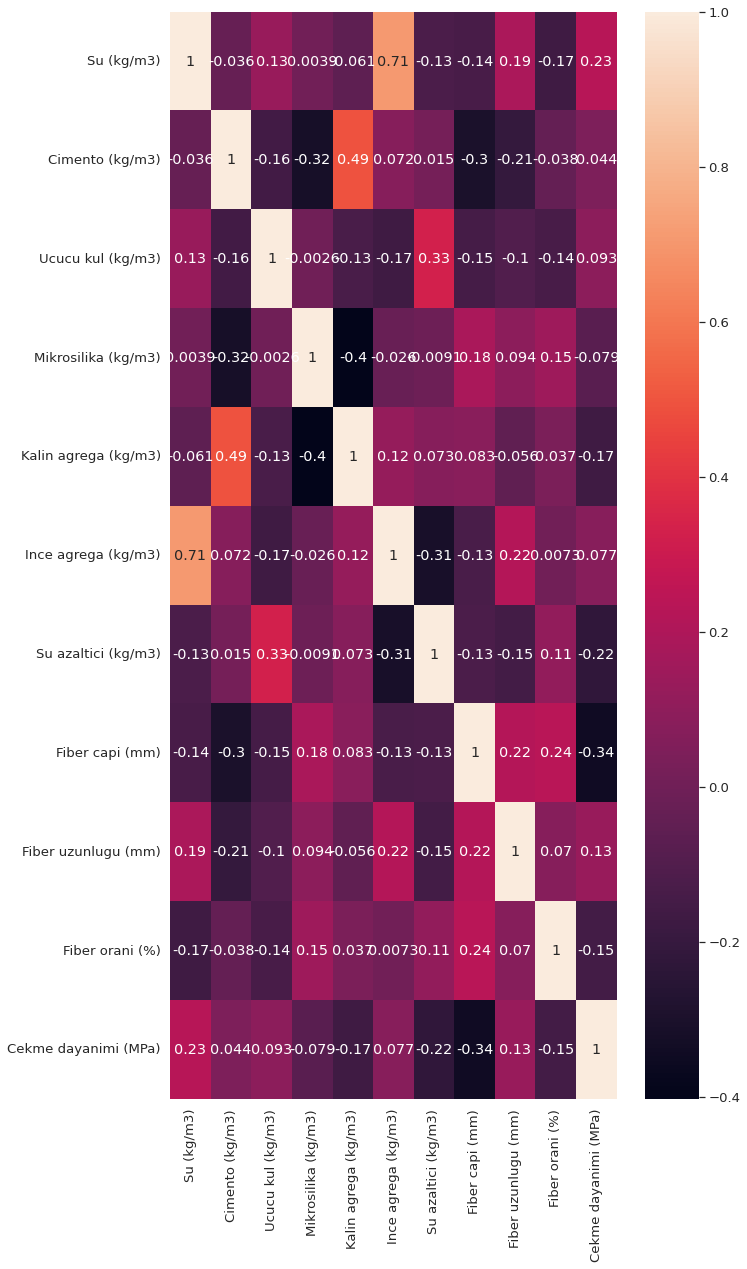

In [548]:
from matplotlib.cm import scale
corr = dt.corr()
sns.heatmap(corr, annot = True)




##DATA VISUALIZATION





In [521]:
#sns.set(style='white',font_scale=1.2, rc={'figure.figsize':(10,20)})
#ax=dt.hist(bins=20,color='red' )

#CORRELATIONS SCATTER PLOT 

In [522]:
#sns.pairplot(dt, height=3)

#Target Feature Separation

'Stress' Seperation

In [523]:
X = dt.drop(['Fiber orani (%)','Fiber capi (mm)','Fiber uzunlugu (mm)'], axis = 1)
y1 = dt['Fiber capi (mm)']
y2=dt['Fiber orani (%)']
y3=dt['Fiber uzunlugu (mm)']

In [524]:
X

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.74
...,...,...,...,...,...,...,...,...
262,264.0,0.0,0.0,851.0,507.0,145,0.0,2.64
263,264.0,0.0,0.0,851.0,507.0,145,0.0,2.43
264,264.0,0.0,0.0,851.0,507.0,145,0.0,2.72
265,264.0,0.0,0.0,851.0,507.0,145,0.0,2.56


# Feature Shape Control

In [525]:
y1.shape,X.shape

((267,), (267, 8))

In [526]:
y2.shape,X.shape

((267,), (267, 8))

In [527]:
y3.shape,X.shape

((267,), (267, 8))

#Feature visualization 

First 5 lines for feature 'Stress' and 'max diameter' 

In [528]:
X.head()

,Su (kg/m3),Cimento (kg/m3),Ucucu kul (kg/m3),Mikrosilika (kg/m3),Kalin agrega (kg/m3),Ince agrega (kg/m3),Su azaltici (kg/m3),Cekme dayanimi (MPa)
0,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.03
1,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.17
2,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.35
3,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.52
4,450.0,0.0,0.0,1150.0,670.0,207,0.0,4.74


#Split

Train Test Split for 'Stress'

In [529]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

#Normalization Scaler

In [530]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [531]:
X_train.shape

(213, 8)


# MultiOutput Regressor



In [532]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as lr

In [533]:
from sklearn.ensemble import GradientBoostingRegressor
mor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

In [534]:
#rf = RandomForestRegressor(n_estimators = 400, random_state =0)
#mor = MultiOutputRegressor(rf)

In [535]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 6,
          'learning_rate': 0.005,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model = GradientBoostingRegressor(**params)



# Modeli eğitme
gb_model.fit(X_train, y2_train)
mor = MultiOutputRegressor(gb_model)
mor.fit(X_train, np.column_stack((y1_train, y2_train,y3_train)))


MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.005,
                                                         max_depth=5,
                                                         min_samples_split=6,
                                                         n_estimators=500))

#Mean Square Error (MSE)

In [536]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [537]:
mse_y1 = mean_squared_error(y1_test,y1_pred)
mse_y2 = mean_squared_error(y2_test, y2_pred)
mse_y3 = mean_squared_error(y3_test, y3_pred)

print(f"Y1 için MSE: {mse_y1:.2f}")
print(f"Y2 için MSE: {mse_y2:.2f}")
print(f"Y3 için MSE: {mse_y3:.2f}")

Y1 için MSE: 0.00
Y2 için MSE: 0.01
Y3 için MSE: 8.76


## R-Square Error (R²)

In [539]:
r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)
r2_y3 = r2_score(y3_test, y3_pred)
print(f"Y1 için R-kare: {r2_y1:.2f}")
print(f"Y2 için R-kare: {r2_y2:.2f}")
print(f"Y3 için R-kare: {r2_y3:.2f}")

Y1 için R-kare: 0.81
Y2 için R-kare: 0.31
Y3 için R-kare: 0.76


#Improvement with Hyperparameter Tuning

In [540]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 300,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'quantile'}

# Modeli oluşturma
gb_model1 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model1.fit(X_train, y1_train)

# Model performansını değerlendire
mse = mean_squared_error(y1_test, y1_pred)
r2 = gb_model1.score(X_test, y1_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 0.00
R^2 score: 0.85


In [538]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 710,
          'max_depth': 4,
          'min_samples_split': 8,
          'learning_rate': 0.005,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model2 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model2.fit(X_train, y2_train)

# Model performansını değerlendirme
mse = mean_squared_error(y2_test, y2_pred)
r2 = gb_model2.score(X_test, y2_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))


MSE: 0.01
R^2 score: 0.39


In [541]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor modeli için ayarlar
params = {'n_estimators': 300,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

# Modeli oluşturma
gb_model3 = GradientBoostingRegressor(**params)

# Modeli eğitme
gb_model3.fit(X_train, y3_train)

# Model performansını değerlendire
mse = mean_squared_error(y3_test, y3_pred)
r2 = gb_model3.score(X_test, y3_test)

print("MSE: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))

MSE: 8.76
R^2 score: 0.82


#An Example of Using the Model

In [557]:
oran=gb_model1.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [558]:
cap=gb_model2.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [559]:
uzunluk=gb_model3.predict(np.array([[363.3,67.8,72.7,1143,659,155,7.56,3.4]]))

In [560]:
print(f"Tahmin edilen değerler=\nFiber capi (mm)={cap}\nFiber uzunlugu (mm)={uzunluk}\nFiber orani (%)={oran} \n\nGerçek değerler=\n{dt.iloc[249,7:10]}")

Tahmin edilen değerler=
Fiber capi (mm)=[0.15065907]
Fiber uzunlugu (mm)=[17.55059244]
Fiber orani (%)=[0.13187413] 

Gerçek değerler=
Fiber capi (mm)         0.015
Fiber uzunlugu (mm)    12.000
Fiber orani (%)         0.100
Name: 249, dtype: float64
